 #                 Network security: Project - AI and Intrusion Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# I - Import the dataset

In [2]:
data = pd.read_csv('Partial-IDS-IoT-Dataset.csv', sep=";")

In [3]:
data

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,...,Backward_IAT_Min,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation,Class
0,52717,9020,6,98,0,2,0,2776,0,0,...,98,0,64,0.000000,20408.163265,1388,1388,1388.000000,0.000000,Scan
1,443,43238,6,184,1,1,1441,1441,1441,1441,...,0,32,32,5434.782609,5434.782609,1441,1441,1441.000000,0.000000,Mirai
2,10000,10101,17,206,2,1,2860,1430,1430,1430,...,0,16,8,9708.737864,4854.368932,1430,1430,1430.000000,0.000000,Mirai
3,52727,9020,6,141,0,3,0,4164,0,0,...,70,0,96,0.000000,21276.595745,1388,1388,1388.000000,0.000000,Scan
4,64774,9988,17,8,4,1,128,32,32,32,...,0,32,8,500000.000000,125000.000000,32,32,32.000000,0.000000,Mirai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,52717,9020,6,119,0,2,0,1418,0,0,...,119,0,64,0.000000,16806.722689,30,1388,935.333333,784.041666,Scan
9908,64778,9988,17,13,8,1,256,32,32,32,...,0,64,8,615384.615385,76923.076923,32,32,32.000000,0.000000,Mirai
9909,443,51875,6,81,1,1,1448,1448,1448,1448,...,0,32,32,12345.679012,12345.679012,1448,1448,1448.000000,0.000000,Mirai
9910,56361,10101,17,192,2,1,1560,1430,1430,130,...,0,16,8,10416.666667,5208.333333,130,1430,1105.000000,650.000000,Mirai


In [4]:
data.keys()

Index(['Source_Port', 'Destination_Port', 'Protocol', 'Flow_Duration',
       'Total_Forward_Packets', 'Total_Backward_Packets',
       'Total_Length_Forward_Packets', 'Total_Length_Backward_Packets',
       'Forward_Packets_Length_Max', 'Forward_Packets_Length_Min',
       'Forward_Packets_Length_Mean', 'Backward_Packets_Length_Max',
       'Backward_Packets_Length_Min', 'Backward_Packets_Length_Mean',
       'Packets_Flow_IAT_Mean', 'Packets_Flow_IAT_Standard_Deviation',
       'Packets_Flow_IAT_Max', 'Packets_Flow_IAT_Min', 'Forward_IAT_Total',
       'Forward_IAT_Mean', 'Forward_IAT_Min', 'Backward_IAT_Total',
       'Backward_IAT_Mean', 'Backward_IAT_Min', 'Forward_Header_Length',
       'Backward_Header_Length', 'Forward_Packets_per_Second',
       'Backward_Packets_per_Second', 'Packets_Length_Min',
       'Packets_Length_Max', 'Packets_Length_Mean',
       'Packets_Length_Standard_Deviation', 'Class'],
      dtype='object')

# II - Preprocessing the data

In [5]:
new_data = data.copy() #we will work on this dataset

## Looking for missing values and null values

In [6]:
new_data.count() #counts the number of non NaN values
#we can see here that there isn't any Nan value

Source_Port                            9912
Destination_Port                       9912
Protocol                               9912
Flow_Duration                          9912
Total_Forward_Packets                  9912
Total_Backward_Packets                 9912
Total_Length_Forward_Packets           9912
Total_Length_Backward_Packets          9912
Forward_Packets_Length_Max             9912
Forward_Packets_Length_Min             9912
Forward_Packets_Length_Mean            9912
Backward_Packets_Length_Max            9912
Backward_Packets_Length_Min            9912
Backward_Packets_Length_Mean           9912
Packets_Flow_IAT_Mean                  9912
Packets_Flow_IAT_Standard_Deviation    9912
Packets_Flow_IAT_Max                   9912
Packets_Flow_IAT_Min                   9912
Forward_IAT_Total                      9912
Forward_IAT_Mean                       9912
Forward_IAT_Min                        9912
Backward_IAT_Total                     9912
Backward_IAT_Mean               

In [7]:
new_data.isnull().sum() #counts the number of null values
#we can see here that there isn't any Null value

Source_Port                            0
Destination_Port                       0
Protocol                               0
Flow_Duration                          0
Total_Forward_Packets                  0
Total_Backward_Packets                 0
Total_Length_Forward_Packets           0
Total_Length_Backward_Packets          0
Forward_Packets_Length_Max             0
Forward_Packets_Length_Min             0
Forward_Packets_Length_Mean            0
Backward_Packets_Length_Max            0
Backward_Packets_Length_Min            0
Backward_Packets_Length_Mean           0
Packets_Flow_IAT_Mean                  0
Packets_Flow_IAT_Standard_Deviation    0
Packets_Flow_IAT_Max                   0
Packets_Flow_IAT_Min                   0
Forward_IAT_Total                      0
Forward_IAT_Mean                       0
Forward_IAT_Min                        0
Backward_IAT_Total                     0
Backward_IAT_Mean                      0
Backward_IAT_Min                       0
Forward_Header_L

### Get rid of NaN

In [8]:
"If there was any missing values, we should have used these commands"

# new_data.dropna()

'If there was any missing values, we should have used these commands'

## Convert classes into one-hot

In [9]:
"It looks like there are only 5 types of values in Class, but let's double check this point"

new_data.query("Class!='Mirai' & Class!='Scan' & Class!='DoS' & Class!='Normal'& Class!='Spoofing' ")

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,...,Backward_IAT_Min,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation,Class


In [10]:
#pip install np_utils uncomment this if you have a np.utils missing package

In [11]:
from sklearn.preprocessing import LabelEncoder
y = new_data["Class"]

from keras.utils.np_utils import to_categorical

# we transform each name as an integer number
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
#we convert each integers into one hot encoded (i.e. one binary number)
one_hot_y = to_categorical(encoded_Y)


# III - Training and testing different models

In [12]:
X=new_data.copy().drop(columns=['Class']).to_numpy().reshape(len(data),-1) #to drop the predictions

#we will use a part of this set for training, and the other part for testing

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
normalized_X = transformer.transform(X) #normalized version

#### The following function calculates the average accuracy on n different trainings for a given model in parameter

In [13]:
from sklearn.model_selection import train_test_split
def n_tries(model, X, y, n, verbose = 1):
    X = np.array(X)
    y = np.array(y)
    n_accuracies = 0
    for i in range(n):
        if verbose == 1:
            print(i, '/', n, end='\r')
        #we separate X and y into train and testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
        model.fit(X_train, y_train)
        n_accuracies += model.score(X_test, y_test)
    return n_accuracies/n

#### Number of tries to evaluate the models (put a small number to execute the cells below quickly)

In [14]:
num_tries = 10

### 1) Simple KNN (93.7% / 90.8%)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)

print(" accuracy on X", n_tries(KNN, X, one_hot_y, num_tries))
print(" accuracy on normalized X", n_tries(KNN, normalized_X, one_hot_y, num_tries))

 accuracy on X 0.9379088963619691
 accuracy on normalized X 0.9101192295933966


### 2) Optimized KNN

100%|██████████| 19/19 [02:22<00:00,  7.52s/it]


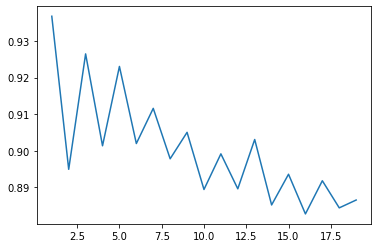

In [16]:
import matplotlib.pyplot as plt
from tqdm import tqdm
lst = []
acc = []
for k in tqdm(range(1,20)):
    KNN = KNeighborsClassifier(n_neighbors=k)
    acc.append(n_tries(KNN, X, one_hot_y, 5, verbose = 0))
    lst.append(k)
    
plt.plot(lst, acc)

#### As we can see, the best k for KNN is k=1, which was the value we already tested before

### 3) Logistic regression (79.1% / 77.7%)

In [17]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
Logistic = LogisticRegression(max_iter=100)
print(" accuracy on X", n_tries(Logistic, X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Logistic, normalized_X, encoded_Y, num_tries))

 accuracy on X 0.7888719046163253
 accuracy on normalized X 0.774717211861816


### 4) Linear discriminant analysis (76.0% / 76.8%)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')
Linear = LinearDiscriminantAnalysis()

print(" accuracy on X", n_tries(Linear, X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Linear, normalized_X, encoded_Y, num_tries))

 accuracy on X 0.7538673188627331
 accuracy on normalized X 0.7669825741363498


### 5) SVM (75.1% / 79.3%)

In [19]:
from sklearn import svm
vector = svm.SVC()
print(" accuracy on X", n_tries(vector, X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(vector, normalized_X, encoded_Y, num_tries))

 accuracy on X 0.7499847141546929
 accuracy on normalized X 0.792846224396209


### 6) Trees (96.6% / 93.0%)

In [20]:
from sklearn.tree import DecisionTreeClassifier
Decision=DecisionTreeClassifier()
print(" accuracy on X", n_tries(Decision, X, one_hot_y, num_tries))
print(" accuracy on normalized X", n_tries(Decision, normalized_X, one_hot_y, num_tries))

 accuracy on X 0.9694894527667381
 accuracy on normalized X 0.9302048303271171


### 7) Random forest (94.2% / 93.9%)

In [21]:
# much longer and less efficient than Decision trees
from sklearn.ensemble import RandomForestClassifier
RandomFor=RandomForestClassifier()
print(" accuracy on X", n_tries(RandomFor, X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(RandomFor, normalized_X, encoded_Y, num_tries))

 accuracy on X 0.9421583613573832
 accuracy on normalized X 0.9389177621522471


### 8) A neural network for classification (78.1% / 84.0%)

In [22]:
from sklearn.neural_network import MLPClassifier
Neural=MLPClassifier()
warnings.filterwarnings('ignore')

print(" accuracy on X", n_tries(Neural, X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Neural, normalized_X, encoded_Y, num_tries))

 accuracy on X 0.7643534087435034
 accuracy on normalized X 0.8381534698868848


### 9) Gradient Boosting (97.2% / 92.5%)

In [23]:
# really long train but great results

from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier()
print(" accuracy on X", n_tries(GradBoost, X, encoded_Y, 2), flush=True)
print(" accuracy on normalized X", n_tries(GradBoost, normalized_X, encoded_Y, 2), flush=True)

 accuracy on X 0.9729440538061754
 accuracy on normalized X 0.9205136044023234


### 10) Stacking Classifier (97.6% / 93.7%)

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



estimators = [('Decision', DecisionTreeClassifier()), 
              ('RandomFor', RandomForestClassifier()), 
              ('GBoos', GradientBoostingClassifier())]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

print(" accuracy on X", n_tries(stack, X, encoded_Y, 1), flush=True)
print(" accuracy on normalized X", n_tries(stack, normalized_X, encoded_Y, 1), flush=True)

 accuracy on X 0.9758483644145521
 accuracy on normalized X 0.9391623356771629


# IV - Columns analysis

#### Correlation

 we can start building a correlation matrix to see which part is link to which part.

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,Forward_Packets_Length_Mean,Backward_Packets_Length_Max,Backward_Packets_Length_Min,Backward_Packets_Length_Mean,Packets_Flow_IAT_Mean,Packets_Flow_IAT_Standard_Deviation,Packets_Flow_IAT_Max,Packets_Flow_IAT_Min,Forward_IAT_Total,Forward_IAT_Mean,Forward_IAT_Min,Backward_IAT_Total,Backward_IAT_Mean,Backward_IAT_Min,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation
Source_Port,1.000000,-0.595640,0.461113,-0.139941,0.188258,-0.035642,-0.222547,-0.003847,-0.434727,-0.421342,-0.436697,-0.196594,-0.282208,-0.243399,-0.246067,-0.009614,-0.167131,-0.275301,-0.002748,0.010064,0.016921,-0.155894,-0.200220,-0.201985,0.040242,-0.149125,0.288377,0.236985,-0.222251,-0.200649,-0.221570,0.018682
Destination_Port,-0.595640,1.000000,-0.275998,-0.066738,-0.033519,-0.161891,0.283339,0.055874,0.540211,0.507460,0.535836,0.314033,0.375327,0.352115,-0.134818,-0.014774,-0.087564,-0.144171,0.006704,-0.004277,-0.011804,-0.090682,-0.125254,-0.129313,0.153784,0.085881,-0.107975,-0.101952,0.270035,0.324684,0.326039,0.105852
Protocol,0.461113,-0.275998,1.000000,-0.078873,0.285047,-0.330031,0.091379,-0.308059,0.037457,0.023363,0.031512,-0.258135,-0.163534,-0.220034,-0.150226,0.001792,-0.098651,-0.171801,0.003017,0.008891,0.015527,-0.102865,-0.140496,-0.142107,0.079630,-0.673153,0.374332,0.277778,-0.175612,-0.246789,-0.234152,-0.135015
Flow_Duration,-0.139941,-0.066738,-0.078873,1.000000,0.017095,0.217545,0.169483,-0.048910,-0.036726,-0.062264,-0.048163,-0.096911,-0.107969,-0.108607,0.742015,0.761253,0.937334,0.474696,0.802374,0.668026,0.444158,0.867835,0.725688,0.611721,0.120219,0.111642,-0.053813,-0.057349,-0.099471,-0.078738,-0.099850,0.003929
Total_Forward_Packets,0.188258,-0.033519,0.285047,0.017095,1.000000,-0.218443,0.232027,-0.170179,-0.010611,-0.029600,-0.016451,-0.158393,-0.113098,-0.141194,-0.074671,0.011826,-0.026420,-0.088699,0.077677,0.010670,0.004306,-0.034900,-0.055978,-0.059144,0.849416,-0.266801,0.490192,0.006416,-0.121804,-0.154726,-0.147346,-0.073501
Total_Backward_Packets,-0.035642,-0.161891,-0.330031,0.217545,-0.218443,1.000000,-0.247901,0.377330,-0.390459,-0.367725,-0.387649,0.050469,-0.099648,-0.016832,0.174698,0.086933,0.193549,0.160613,0.091267,0.051769,0.002692,0.270970,0.188753,0.155318,-0.283998,0.801010,-0.198708,-0.107759,-0.035929,0.036415,0.009854,0.105132
Total_Length_Forward_Packets,-0.222547,0.283339,0.091379,0.169483,0.232027,-0.247901,1.000000,0.118258,0.606169,0.530060,0.594820,0.331761,0.391902,0.370497,-0.063140,0.032873,0.030876,-0.081378,0.291974,0.029153,0.011578,-0.031857,-0.052206,-0.057338,0.551669,-0.194434,-0.043307,-0.098926,0.350086,0.370167,0.389831,0.030071
Total_Length_Backward_Packets,-0.003847,0.055874,-0.308059,-0.048910,-0.170179,0.377330,0.118258,1.000000,0.229492,0.216008,0.227486,0.833798,0.749365,0.823595,-0.144951,-0.012185,-0.088632,-0.158265,0.005767,-0.004125,-0.007600,-0.049496,-0.122791,-0.136646,-0.143335,0.524571,-0.224785,-0.138653,0.725525,0.814770,0.832029,0.202664
Forward_Packets_Length_Max,-0.434727,0.540211,0.037457,-0.036726,-0.010611,-0.390459,0.606169,0.229492,1.000000,0.932284,0.987412,0.592337,0.687924,0.656002,-0.103265,0.003582,-0.059090,-0.118626,0.028690,0.021302,0.011197,-0.063285,-0.091806,-0.097770,0.130051,-0.264732,-0.148522,-0.153582,0.637855,0.630431,0.663448,0.028190
Forward_Packets_Length_Min,-0.421342,0.507460,0.023363,-0.062264,-0.029600,-0.367725,0.530060,0.216008,0.932284,1.000000,0.975900,0.557576,0.647572,0.617538,-0.103282,-0.016959,-0.072875,-0.108167,-0.004836,0.000153,-0.000102,-0.083122,-0.108836,-0.111013,0.075479,-0.245554,-0.137592,-0.139716,0.707046,0.588697,0.647524,-0.111547


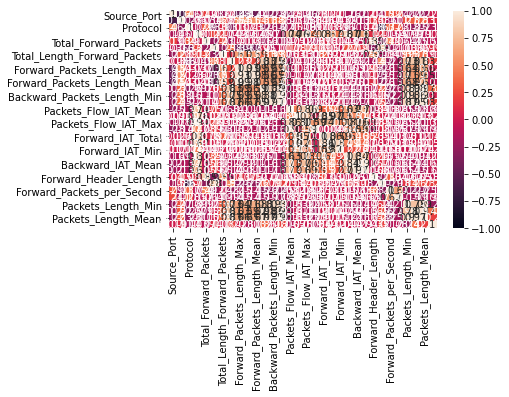

In [25]:
corr = new_data.corr()
sns.heatmap(corr, vmin=-1, vmax=1,annot=True)
corr_df = new_data.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

We can also use boxplots to spot the relevant columns. It is a charting tool for displaying various important statistical indicators such as median, mean and quartiles.

In [26]:
import matplotlib.pyplot as plt

def auto_boxplot(data, column, showfliers = False):
    data2 = data.copy()
    normal = data2.loc[new_data['Class'] == "Normal"]
    mirai = data2.loc[new_data['Class'] == "Mirai"]
    scan = data2.loc[new_data['Class'] == "Scan"]
    spoofing = data2.loc[new_data['Class'] == "Spoofing"]
    dos = data2.loc[new_data['Class'] == "DoS"]
   

    plt.figure()
    plt.title(column)

    plt.boxplot([normal[column], mirai[column], scan[column], spoofing[column], dos[column]], labels =["Normal",  "Mirai", "Scan", "Spoofing", "DoS"], showfliers = showfliers)
    plt.show()

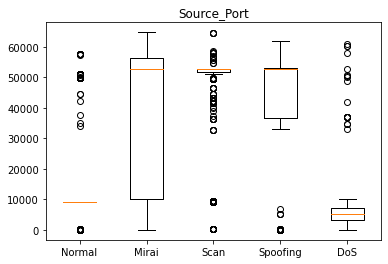

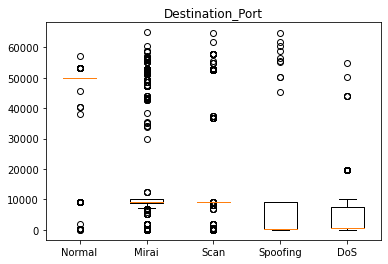

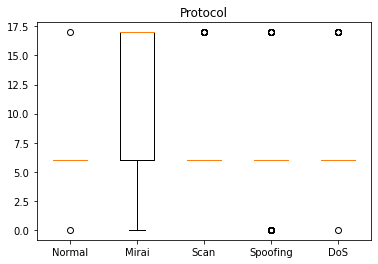

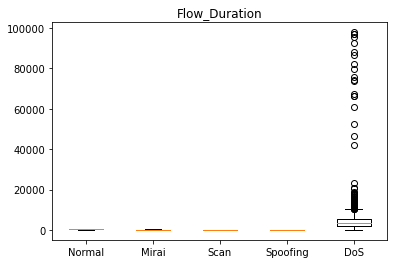

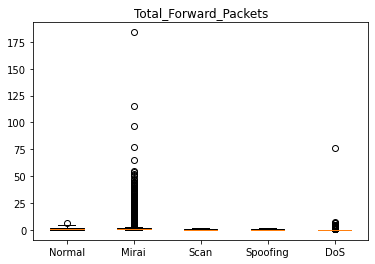

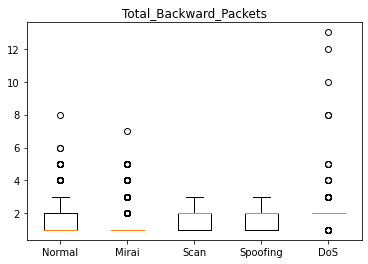

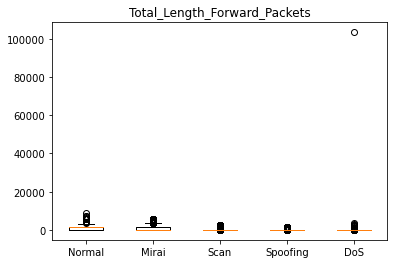

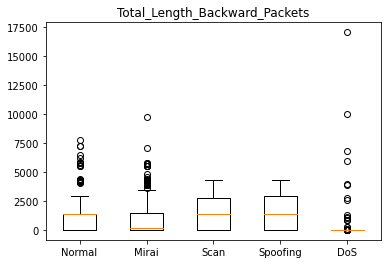

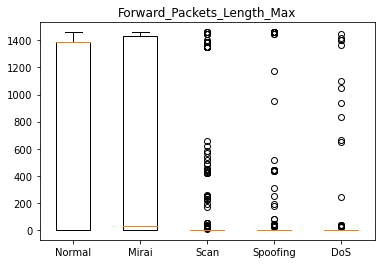

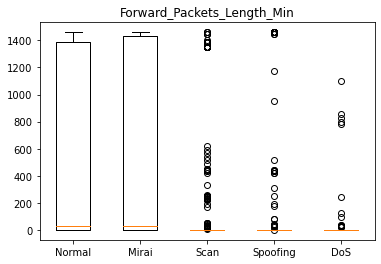

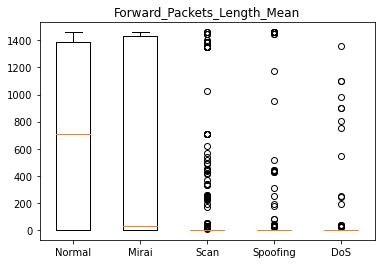

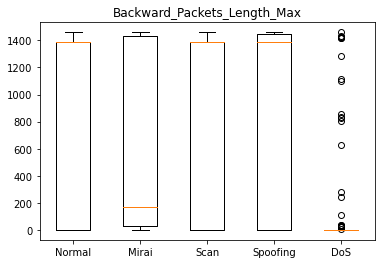

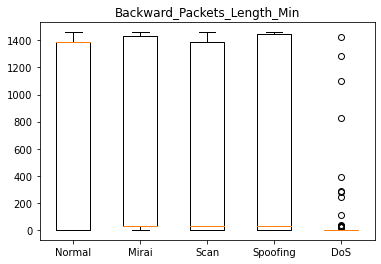

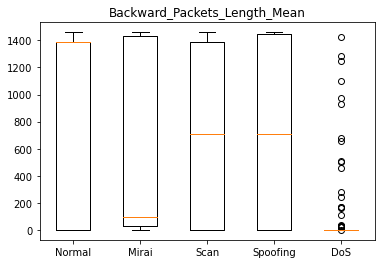

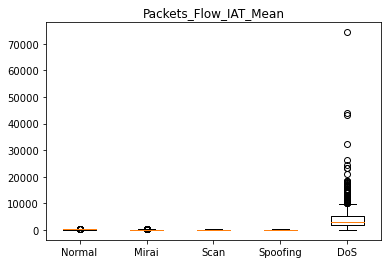

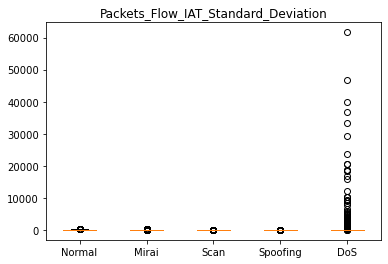

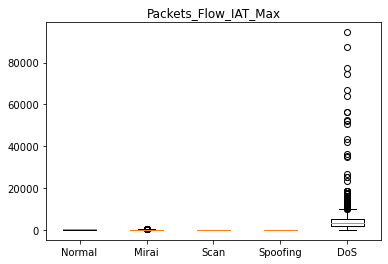

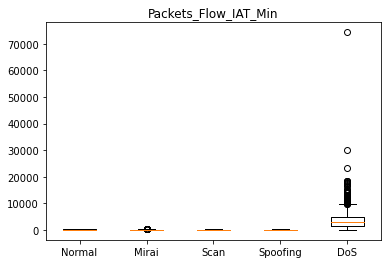

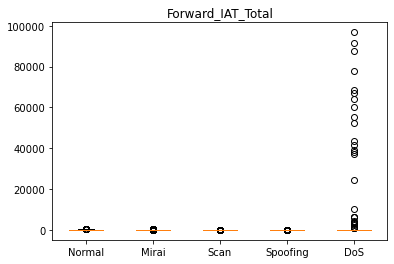

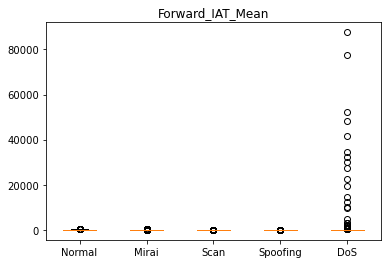

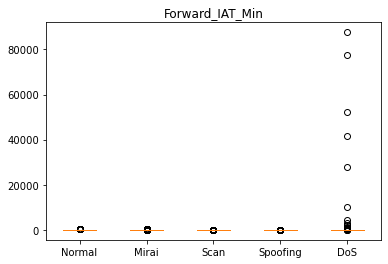

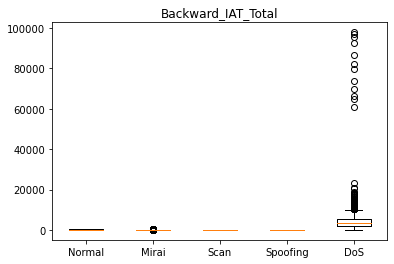

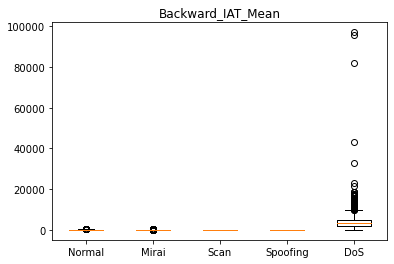

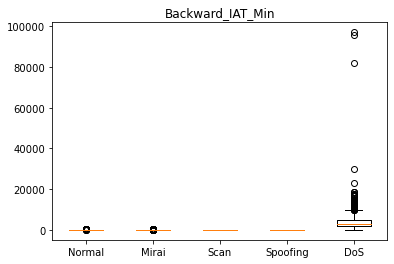

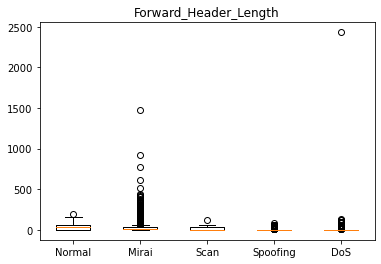

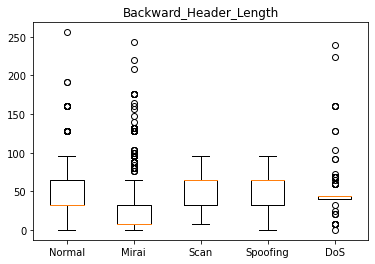

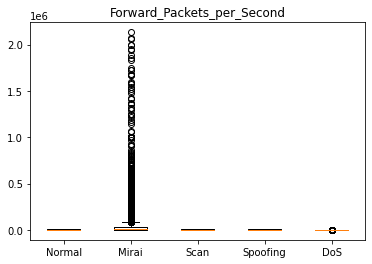

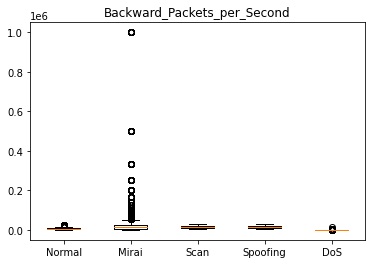

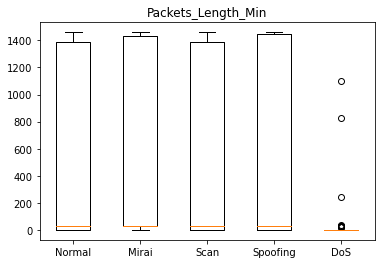

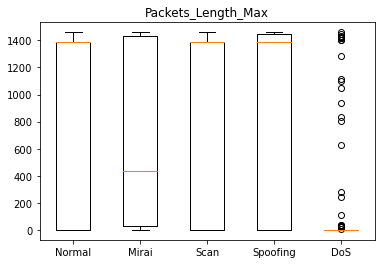

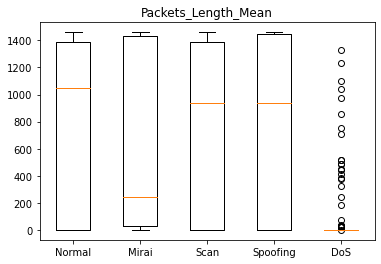

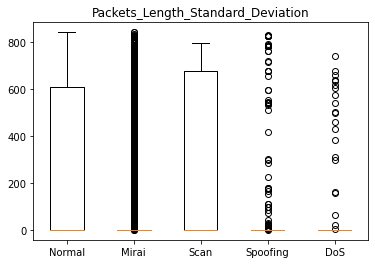

In [27]:
for col in new_data.columns:
    if col !='Class':
        auto_boxplot(new_data, col, True)

# V - Testing with a reduced dataset

In [28]:
#We drop the predictions

other_X = new_data.copy().drop(columns=['Class'])
other_X = other_X.drop(columns=['Total_Length_Forward_Packets'])
other_X = other_X.drop(columns=['Total_Length_Backward_Packets'])
other_X = other_X.drop(columns=['Forward_Packets_Length_Min'])
other_X = other_X.drop(columns=['Packets_Flow_IAT_Mean'])
other_X = other_X.drop(columns=['Packets_Flow_IAT_Standard_Deviation'])
other_X = other_X.drop(columns=['Packets_Flow_IAT_Max'])
other_X = other_X.drop(columns=['Packets_Flow_IAT_Min'])
other_X = other_X.drop(columns=['Forward_IAT_Total'])
other_X = other_X.drop(columns=['Forward_IAT_Mean'])
other_X = other_X.drop(columns=['Forward_IAT_Min'])
other_X = other_X.drop(columns=['Backward_IAT_Total'])
other_X = other_X.drop(columns=['Backward_IAT_Mean'])
other_X = other_X.drop(columns=['Backward_IAT_Min'])
other_X = other_X.drop(columns=['Forward_Header_Length'])
other_X = other_X.drop(columns=['Backward_Header_Length'])
other_X = other_X.drop(columns=['Packets_Length_Min'])
other_X = other_X.drop(columns=['Packets_Length_Standard_Deviation'])
other_X=other_X.to_numpy().reshape(len(data),-1)

#we will use a part of this set for training, and the other part for testing  

In [29]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(other_X)  
normalized_other_X = transformer.transform(other_X)

### 1) Simple KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)

print(" accuracy on X", n_tries(KNN, other_X, one_hot_y, num_tries))
print(" accuracy on normalized X", n_tries(KNN, normalized_other_X, one_hot_y, num_tries))

 accuracy on X 0.937052889024763
 accuracy on normalized X 0.9089575053500459


### 2) Optimized kNN

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
lst = []
acc = []
for k in tqdm(range(1,20)):
    KNN = KNeighborsClassifier(n_neighbors=k)
    acc.append(n_tries(KNN, other_X, one_hot_y, 5, verbose = 0))
    lst.append(k)
    
plt.plot(lst, acc)

#### As we can see, the best k for KNN is k=1, which was the value we already tested before 

### 3) Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(max_iter=100)
warnings.filterwarnings('ignore')

print(" accuracy on X", n_tries(Logistic, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Logistic, normalized_other_X, encoded_Y, num_tries))

 accuracy on X 0.779700397431978
 accuracy on normalized X 0.7667685723020483


### 4) Linear discriminant analysis

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Linear = LinearDiscriminantAnalysis()
print(" accuracy on X", n_tries(Linear, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Linear, normalized_other_X, encoded_Y, num_tries))

 accuracy on X 0.7360134515438703
 accuracy on normalized X 0.7500152858453072


### 5) SVM

In [33]:
from sklearn import svm
vector = svm.SVC()
print(" accuracy on X", n_tries(vector, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(vector, normalized_other_X, encoded_Y, num_tries))

 accuracy on X 0.7483338428615103
 accuracy on normalized X 0.7906450626719658


### 6) Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier
Decision=DecisionTreeClassifier()
print(" accuracy on X", n_tries(Decision, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Decision, normalized_other_X, encoded_Y, num_tries))

 accuracy on X 0.9717823295628248
 accuracy on normalized X 0.9306022623051055


### 7) Random forest

In [37]:
# much longer and less efficient than Decision trees
from sklearn.ensemble import RandomForestClassifier
RandomFor=RandomForestClassifier()
print(" accuracy on X", n_tries(RandomFor, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(RandomFor, normalized_other_X, encoded_Y, num_tries))

 accuracy on X 0.9581779272393763
 accuracy on normalized X 0.9414246407826352


### 8) A neural network for classification

In [38]:
from sklearn.neural_network import MLPClassifier
Neural=MLPClassifier()
warnings.filterwarnings('ignore')

print(" accuracy on X", n_tries(Neural, other_X, encoded_Y, num_tries))
print(" accuracy on normalized X", n_tries(Neural, normalized_other_X, encoded_Y, 1))

 accuracy on X 0.7758789361051667
 accuracy on normalized X 0.8336288596759402


### 9) Gradient Boosting

In [35]:
# really long train but great results

from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier()
print(" accuracy on X", n_tries(GradBoost, other_X, encoded_Y, 2), flush=True)
print(" accuracy on normalized X", n_tries(GradBoost, normalized_other_X, encoded_Y, 2), flush=True)

 accuracy on X 0.972791195353103
 accuracy on normalized X 0.925710791806787


### 10) Stacking Classifier

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



estimators = [('Decision', DecisionTreeClassifier()), 
              ('RandomFor', RandomForestClassifier()), 
              ('GBoos', GradientBoostingClassifier())]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

print(" accuracy on X", n_tries(stack, other_X, encoded_Y, 1), flush=True)
print(" accuracy on normalized X", n_tries(stack, normalized_other_X, encoded_Y, 1), flush=True)

 accuracy on X 0.9773769489452767
 accuracy on normalized X 0.9409966371140324
